# Visualize and bring together data from the SAIL campaign and NOAA

When reading and analyzing data, its is useful to bring together data from different organizations. This not only expands the data available for scientists and their research, but is also useful for quality controls checks. In this notebook, we look at both the datasets produce by ARM instruments in the SAIL campaign as well as instruments provided by NOAA at their KPS site near the SAIL campaign location.

## Imports

In [1]:
# Import our modules
import datetime as dt
import glob


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import act

## Download and visualize our data using ACT

In [2]:
# Download the NOAA KPS site files from 22:00 and 23:00
result_22_kps = act.discovery.download_noaa_psl_data(
    site='kps', instrument='Radar FMCW Moment', startdate='20220801', hour='22')
result_23_kps = act.discovery.download_noaa_psl_data(
    site='kps', instrument='Radar FMCW Moment', startdate='20220801', hour='23')

In [3]:
# Read in the .raw file.  Spectra data are also downloaded
obj1_kps = act.io.noaapsl.read_psl_radar_fmcw_moment([result_22_kps[-1], result_23_kps[-1]])

# Read in the parsivel files from NOAA's webpage.
url = ['https://downloads.psl.noaa.gov/psd2/data/realtime/DisdrometerParsivel/Stats/kps/2022/213/kps2221322_stats.txt',
       'https://downloads.psl.noaa.gov/psd2/data/realtime/DisdrometerParsivel/Stats/kps/2022/213/kps2221323_stats.txt']
obj2_kps = act.io.noaapsl.read_psl_parsivel(url)

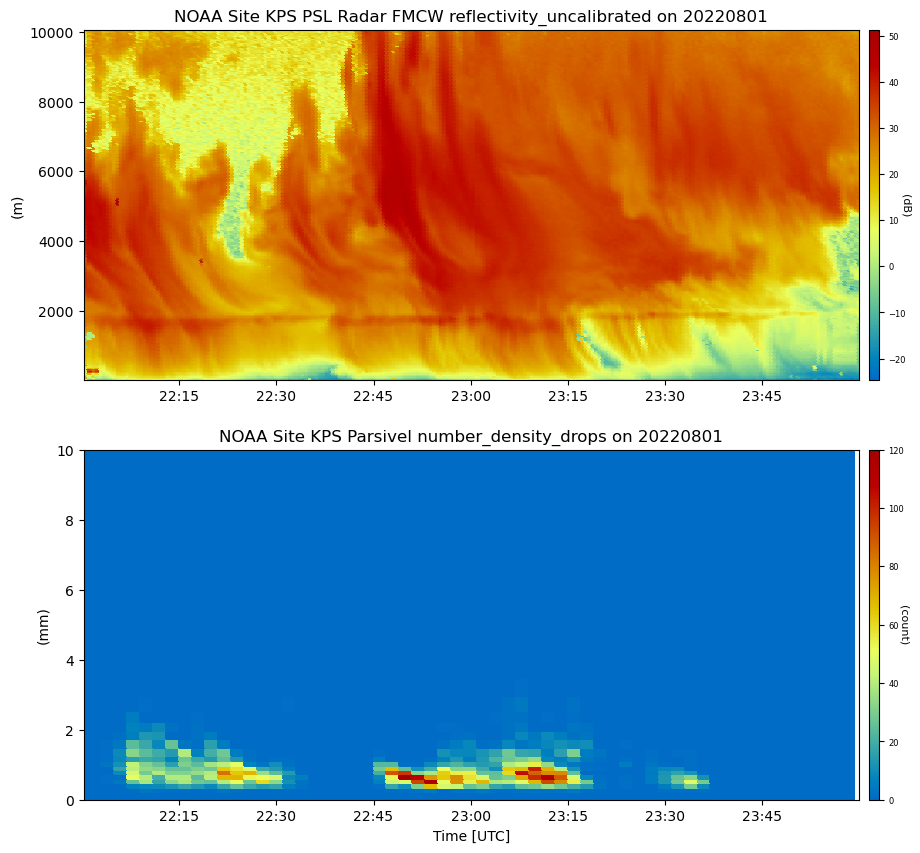

In [4]:
# First we plot the NOAA FMCW and parsivel from the KPS site

# Create display object with both datasets
display = act.plotting.TimeSeriesDisplay(
    {"NOAA Site KPS PSL Radar FMCW": obj1_kps, "NOAA Site KPS Parsivel": obj2_kps},
    subplot_shape=(2,), figsize=(10, 10))

# Plot the subplots
display.plot('reflectivity_uncalibrated', dsname='NOAA Site KPS PSL Radar FMCW',
             cmap='act_HomeyerRainbow', subplot_index=(0,))
display.plot('number_density_drops', dsname='NOAA Site KPS Parsivel',
             cmap='act_HomeyerRainbow', subplot_index=(1,))
# Set limits
display.axes[1].set_ylim([0, 10])
plt.show()

## Create a Multipanel Plot to Compare the KAZR and Parsivel

In [5]:
# Use arm username and token to retrieve files.
# This is commented out as the files have already been downloaded.

#token = 'arm_token'
#username = 'arm_username'

In [6]:
#Specify datastream and date range for KAZR data
ds_kazr = 'guckazrcfrgeM1.a1'
startdate = '2022-08-01'
enddate = '2022-08-01'

# Data already retrieved, but showing code below on how to download the files.
#act.discovery.download_data(username, token, ds_kazr, startdate, enddate)

# Index last 2 files for the 22:00 and 23:00 timeframe.
kazr_files = glob.glob(''.join(['./',ds_kazr,'/*nc']))
kazr_files[-2:]
kazr = act.io.armfiles.read_netcdf(kazr_files[-2:])

In [7]:
#Specify datastream and date range for KAZR data
ds_ld = 'gucldM1.b1'
startdate = '2022-08-01'
enddate = '2022-08-01'

# Data already retrieved, but showing code below on how to download the files.
#act.discovery.download_data(username, token, ds_ld, startdate, enddate)

# Index last 2 files for the 22:00 and 23:00 timeframe.
ld_files = glob.glob(''.join(['./',ds_ld,'/*cdf']))
ld = act.io.armfiles.read_netcdf(ld_files[0])

C:\Users\sherm\AppData\Local\Temp\ipykernel_15924\1307396719.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  display.axes[0, 0].set_yticklabels(['0', '2', '4','6', '8', '10'])
C:\Users\sherm\AppData\Local\Temp\ipykernel_15924\1307396719.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  display.axes[0, 1].set_yticklabels(['0', '2', '4','6', '8', '10'])


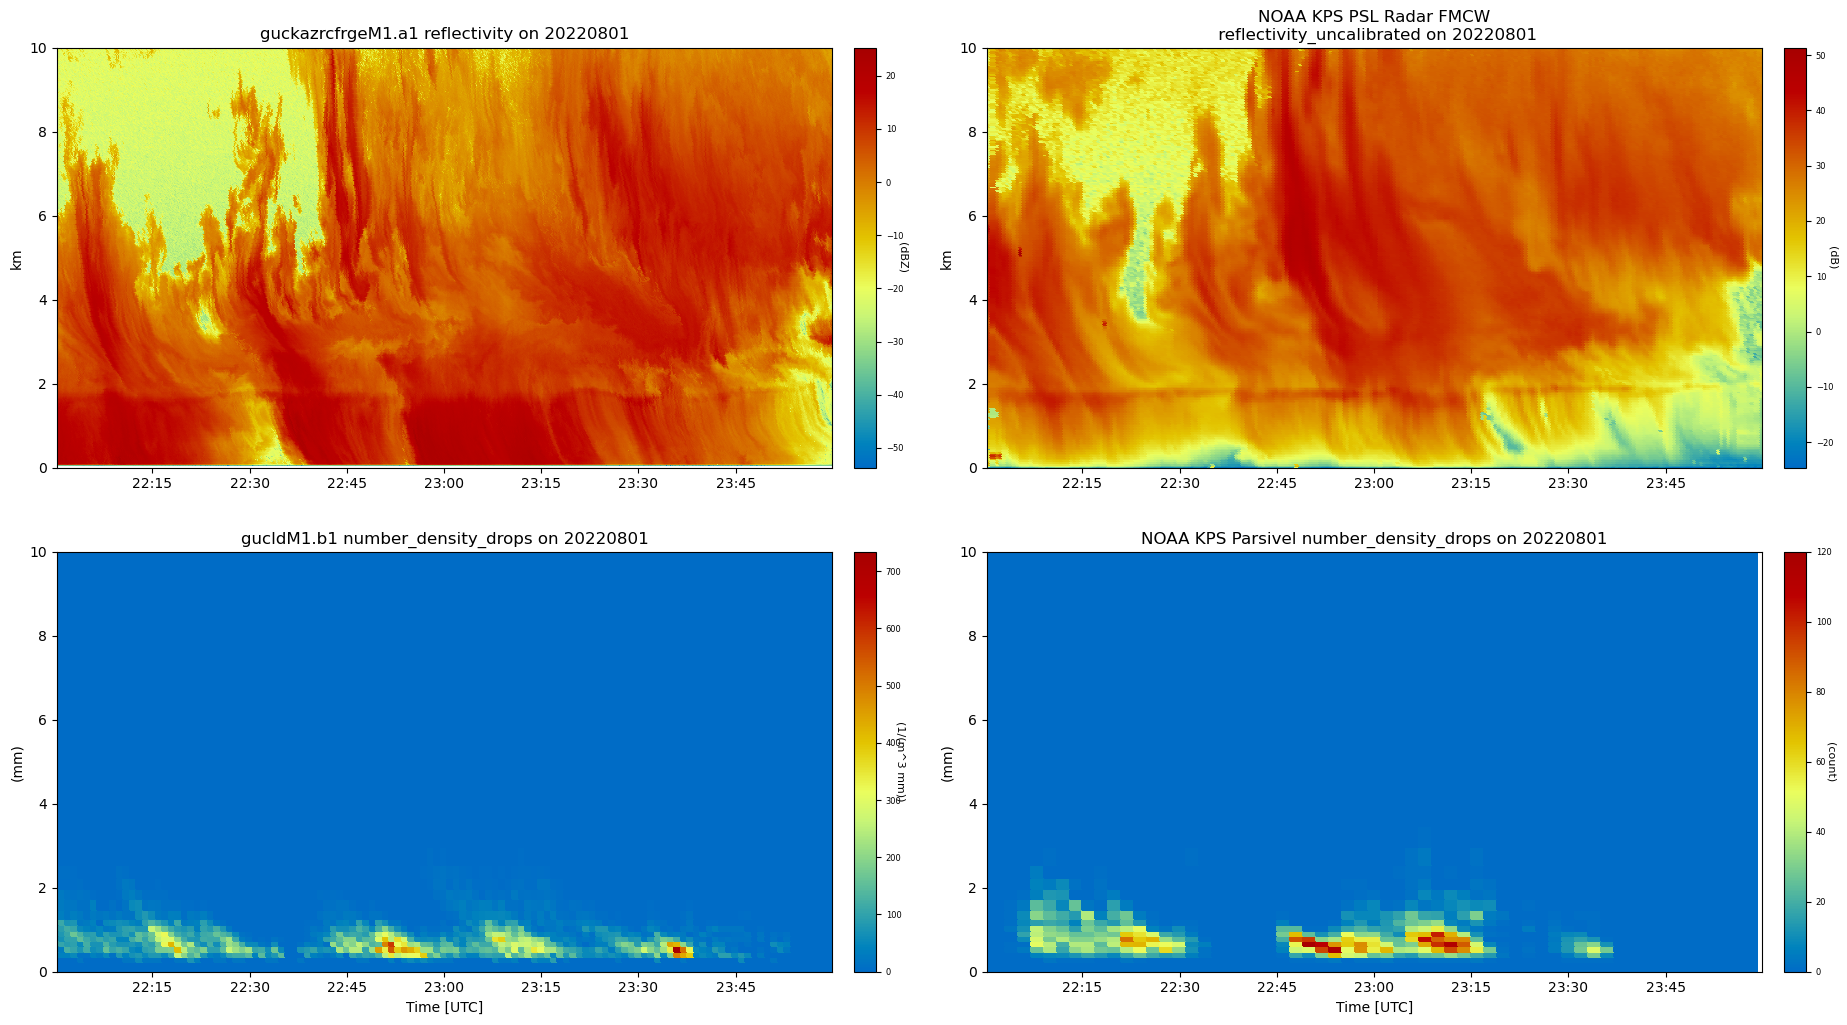

In [8]:
# We now want to plot and compare ARM and NOAA's instruments.

# Create a series display with all 4 datasets
display = act.plotting.TimeSeriesDisplay(
    {"NOAA KPS PSL Radar FMCW": obj1_kps, "NOAA KPS Parsivel": obj2_kps,
     "guckazrcfrgeM1.a1": kazr, 'gucldM1.b1': ld},
    subplot_shape=(2, 2), figsize=(22, 12))

# Set custom 2 line title for space
title = "NOAA KPS PSL Radar FMCW\n reflectivity_uncalibrated on 20220801"

# Plot the four subplots
display.plot('reflectivity_uncalibrated', dsname='NOAA KPS PSL Radar FMCW',
             cmap='act_HomeyerRainbow', set_title=title, subplot_index=(0, 1))
display.plot('number_density_drops', dsname='NOAA KPS Parsivel',
             cmap='act_HomeyerRainbow', subplot_index=(1, 1))
display.plot('reflectivity', dsname='guckazrcfrgeM1.a1',
             cmap='act_HomeyerRainbow', subplot_index=(0, 0))
display.plot('number_density_drops', dsname='gucldM1.b1',
             cmap='act_HomeyerRainbow', subplot_index=(1, 0))

# Update limits
display.axes[1, 0].set_ylim([0, 10])

display.axes[1, 1].set_ylim([0, 10])


display.axes[0, 0].set_ylim([0, 10000])
display.axes[0, 0].set_yticklabels(['0', '2', '4','6', '8', '10'])
display.axes[0, 0].set_ylabel('km')

display.axes[0, 1].set_ylim([0, 10000])
display.axes[0, 1].set_yticklabels(['0', '2', '4','6', '8', '10'])
display.axes[0, 1].set_ylabel('km')

plt.show()

## Add Doppler Lidar Retrieved Winds

In [9]:
#Specify datastream and date range for KAZR data
ds_dl = 'gucdlppiM1.b1'
startdate = '2022-08-01'
enddate = '2022-08-01'

#act.discovery.download_data(username, token, ds_dl, startdate, enddate)
dl_ppi_files = glob.glob(''.join(['./',ds_dl,'/*cdf']))
dl_ppi_files[-9:]

# Index last 9 files for the 22:00 and 23:00 timeframe.
dl_ppi = act.io.armfiles.read_netcdf(dl_ppi_files[-9:])

In [10]:
# Calculate the winds from the gucdlppi dataset.
wind_obj = act.retrievals.compute_winds_from_ppi(dl_ppi, snr_threshold=0.002)

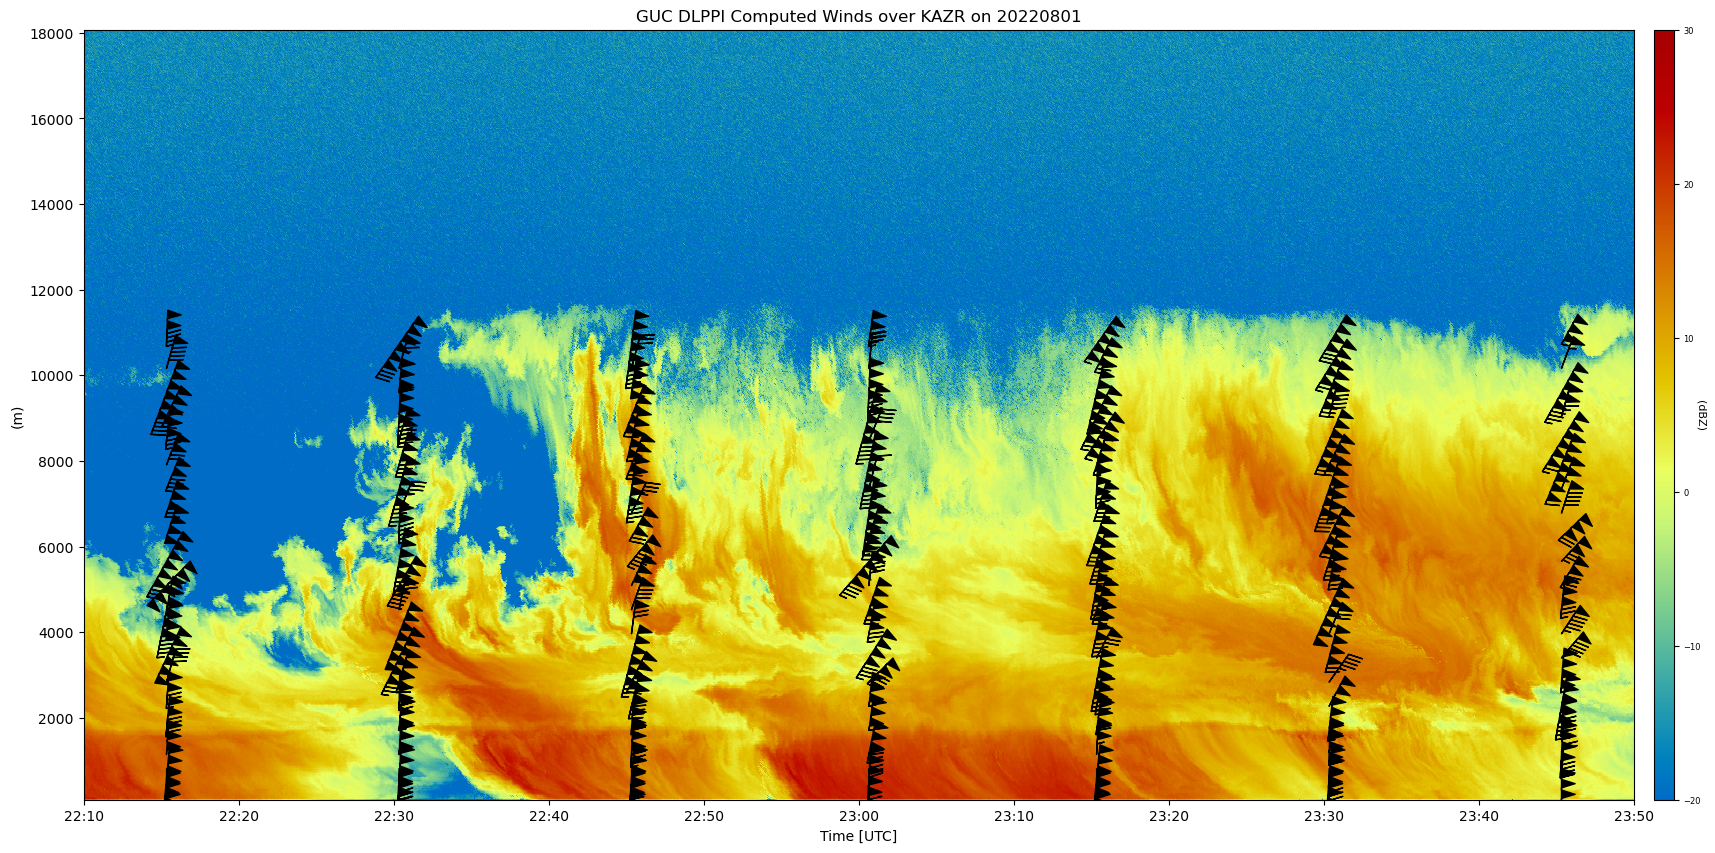

In [11]:
# Create a display object.
display = act.plotting.TimeSeriesDisplay(
    {"GUC DLPPI Computed Winds over KAZR": wind_obj,
     "guckazrcfrgeM1.a1": kazr,}, figsize=(20, 10))

# Plot the wind barbs overlayed on the KAZR reflectivity
display.plot('reflectivity', dsname='guckazrcfrgeM1.a1',
             cmap='act_HomeyerRainbow', vmin=-20, vmax=30)
display.plot_barbs_from_spd_dir('wind_direction', 'wind_speed',
                                dsname='GUC DLPPI Computed Winds over KAZR',
                                invert_y_axis=False)

# Update the x-limits to make sure both wind profiles are shown
display.axes[0].set_xlim([np.datetime64('2022-08-01T22:10'), np.datetime64('2022-08-01T23:50')])
plt.show()

## Conclusion

By comparing these datasets, we can see similar and differences between the two datasets, but overall the structure is comparable. We can see the usefulness of ACT to not only read ARM datasets, but datasets outside of ARM. These workflows allow for scientists to have many different tools to use different datasets for their research, as well as quality control checks